The project is to build a machine learning regression model will predict the number of absent hours.

As Employee absenteeism is a major problem faced by every employer which eventually lead to the backlogs, piling of the work, delay in deploying the project and can have a major effect on company finances and other issues.

The purpose of this project is to find an issue which eventually leads toward the absence of an employee and provide a proper solution to reduce the absenteeism.

In [ ]:
pip install fancyimpute

In [ ]:
# Import all the library
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import knnimpute
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

## Dataset Details:
Dataset Characteristics: Timeseries Multivariant

### Number of Attributes: 21

### Attribute Information:
===============================

1. Individual identification (ID)
2. Reason for absence (ICD).
3. Month of absence
4. Day of the week (2. MONDAY 3. TUESDAY 4. WEDNESDAY 5. 5. THURSDAY 6. FRIDAY)
5. Seasons (1. SUMMER 2. AUTUMN 3. WINTER 4. SPRING)
6. Transportation expense
7. Distance from Residence to Work (kilometres)
8. Service time
9. Age
10. Workload Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (HIGH SCHOOL (1), GRADUATE (2), POSTGRADUATE (3), MASTER AND DOCTOR (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours

In [ ]:
data = pd.read_excel('/content/data_set.xls', header=0, na_values= ['',' ','NA','na','Na','N/A','N/a','n/a'])

In [ ]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [ ]:
#Defining feature as categorical
Categorical_col = ['Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Disciplinary failure', 'Education', 'Social drinker',
       'Social smoker']
Non_Categorical_col = [i for i in data.columns if i not in Categorical_col]
for i in data.columns:
    if i in Categorical_col: data[i] = pd.Categorical(data[i])

## 1. Applying ML, removing all the missing value of data

In [ ]:
# Self Defined function
####################################################################################################################
# Return the percentage of missing data in the original dataset
def PerOfMissing(d1,d2):# d1--data by droping the NAN value d2--Original data
    percent_of_missing_data = round( 100 - ((len(d1)/len(d2))*100), 2)
    percent_of_missing_data = str(percent_of_missing_data) + '% of data has Missing value'
    return percent_of_missing_data
####################################################################################################################
# Return MAE, MRSE, R², Adjusted R²
def reg_acc(y_true, y_pre):
    print ("MSE of data: ", mean_squared_error(y_true,y_pre))
    print ("***RMSE of data: ", sqrt(mean_squared_error(y_true,y_pre)),'***')
    print ('Other Parameters:')
    print ("R² : ", r2_score(y_true,y_pre))
    print ('MAE:',mean_absolute_error(y_true,y_pre))

In [ ]:
# droping all the NAN value from the data and saving the data in data_without_NAN
data_without_NAN = data.dropna()
print (PerOfMissing(data_without_NAN,data))

13.65% of data has Missing value


## 2. Model Applied by removing the missing value and preprocessing  the data

In [ ]:
data_without_NAN = data_without_NAN.drop(['Height','Weight'],axis=1)
scaling_col = ['Transportation expense', 'Distance from Residence to Work','Service time',
              'Work load Average/day ', 'Hit target','Body mass index']

for i in scaling_col:
    data_without_NAN[i]=(data_without_NAN[i]-min(data_without_NAN[i]))/(max(data_without_NAN[i])-min(data_without_NAN[i]))
    #print(i,': Scaling Done')



# Checking the outcome without preprocessing of the data set
#imputing the training and testing data with test_split
from sklearn.model_selection import train_test_split
X = data_without_NAN.drop(['Absenteeism time in hours'], axis=1)
Y = data_without_NAN['Absenteeism time in hours']
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2)

print('#####____MODEL_CHECK____#########')
## KNN model
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor(n_neighbors=7).fit(x_train,y_train)
y_KNN_predict = KNN_model.predict(x_test)
#accuracy_KNN =  KNN_model.score(y_KNN_predict,y_test)
##print ("accuracy", accuracy_KNN*100)
print('KNN model')
reg_acc(y_KNN_predict,y_test)
print('###########')
print('###########')
# Decision Tree
from sklearn import tree
dec_model   = tree.DecisionTreeRegressor().fit(x_train,y_train)
y_dec_model = dec_model.predict(x_test)
#accuracy_c50 =  c50_model.score(x_test,y_test)
print('Decision Tree')
reg_acc(y_dec_model,y_test)
print('###########')
print('###########')
#Random Forest
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=20).fit(x_train,y_train)
y_rf_predict = RF_model.predict(x_test)
print('Random Forest')
reg_acc(y_rf_predict,y_test)
print('###########')
print('###########')

#Linear Reg
from sklearn.linear_model import LinearRegression
lReg = LinearRegression().fit(x_train,y_train)
l_predict = lReg.predict(x_test)
reg_acc(l_predict,y_test)
print('Linear Regression')
print('Intercept :',lReg.intercept_)
print('Coefficient')
for i,coef in zip(data_without_NAN.columns,lReg.coef_):
    print (i,"-->",coef)

#####____MODEL_CHECK____#########
KNN model
MSE of data:  148.19961734693877
***RMSE of data:  12.173726518488033 ***
Other Parameters:
R² :  -2.916783421972336
MAE: 5.433035714285714
###########
###########
Decision Tree
MSE of data:  377.33875868055554
***RMSE of data:  19.425209360018634 ***
Other Parameters:
R² :  -0.493905298654693
MAE: 7.826822916666666
###########
###########
Random Forest
MSE of data:  209.39263978407118
***RMSE of data:  14.470405653749696 ***
Other Parameters:
R² :  -2.1465211841979834
MAE: 6.341920572916667
###########
###########
MSE of data:  157.37398992187326
***RMSE of data:  12.544879031775206 ***
Other Parameters:
R² :  -5.877457372305821
MAE: 5.769448429661428
Linear Regression
Intercept : 24.222504324656512
Coefficient
ID --> -0.12819169396160282
Reason for absence --> -0.4328925129523302
Month of absence --> -0.005115023977772947
Day of the week --> -0.8445941214916086
Seasons --> 0.10253078626444241
Transportation expense --> 1.8721530796630277
Di

#Pre-Processing the data

## 1. Applying missing value analysis

### Check missing value is good for the data

In [ ]:
#Creating list of columns name on basis of NAN value
col_with_nan, col_without_nan = [],[]
for i in data.columns:
    if data[i].isnull().sum() > 0:
        col_with_nan.append(i)
    else :col_without_nan.append(i)

#Creating the table which columns has how much missing value
missing_val = pd.DataFrame(data.isnull().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns={'index': 'Variables', 0: 'Missing_Val'})
missing_val['Missing_per'] = round((missing_val['Missing_Val']/len(data))*100,2)
missing_val = missing_val.sort_values('Missing_per', ascending= False).reset_index(drop = True)
missing_val

,Variables,Missing_Val,Missing_per
0,Body mass index,31,4.19
1,Absenteeism time in hours,22,2.97
2,Height,14,1.89
3,Work load Average/day,10,1.35
4,Education,10,1.35
5,Transportation expense,7,0.95
6,Son,6,0.81
7,Disciplinary failure,6,0.81
8,Hit target,6,0.81
9,Social smoker,4,0.54


In [ ]:
#random Number
index_NO_nan = data.dropna().index
random_index = []
for i in range(len(col_with_nan)):
    random_index.append(random.choice(index_NO_nan))
####################################################################################################################

#replacing data with nan
dum = data.copy()
for i in range(len(col_with_nan)):
    dum[col_with_nan[i]].loc[random_index[i]] = np.nan
####################################################################################################################

#created table
actV,meanV,medianV = [],[],[]
for i in range(len(col_with_nan)):
    actV.append(data[col_with_nan[i]].loc[random_index[i]])

for i in range(len(col_with_nan)):
    if col_with_nan[i] in Categorical_col:
        meanV.append(np.nan)#Categorical data has no mean(Error occur )
        medianV.append(np.nan)#Categorical data has no median
    else:
        meanV.append(data[col_with_nan[i]].mean())
        medianV.append(data[col_with_nan[i]].mean())

frame ={'Actual Value': actV,'Mean': meanV, 'Median': medianV}
data_frame = pd.DataFrame(data = frame, index = col_with_nan, dtype =int)

<ipython-input-107-426b356ab799>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dum[col_with_nan[i]].loc[random_index[i]] = np.nan
<ipython-input-107-426b356ab799>:28: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  data_frame = pd.DataFrame(data = frame, index = col_with_nan, dtype =int)


In [ ]:
# Assuming 'dum' is your dataset with missing values
# Assuming 'col_with_nan' is a list of column names with missing values
# Assuming 'random_index' is a list of corresponding row indices with missing values

###########################"KNN with 3"###########################
data_KNN = KNN(k=3).fit_transform(dum)
data_KNN = pd.DataFrame(data=data_KNN, columns=dum.columns)
knn_array = []
for i in range(len(col_with_nan)):
    knn_array.append(int(data_KNN[col_with_nan[i]].loc[random_index[i]]))

data_frame['KNN_3'] = knn_array
print('##########################DONE##########################')


Imputing row 1/740 with 0 missing, elapsed time: 0.102
Imputing row 101/740 with 1 missing, elapsed time: 0.104
Imputing row 201/740 with 0 missing, elapsed time: 0.105
Imputing row 301/740 with 0 missing, elapsed time: 0.107
Imputing row 401/740 with 0 missing, elapsed time: 0.108
Imputing row 501/740 with 0 missing, elapsed time: 0.109
Imputing row 601/740 with 0 missing, elapsed time: 0.110
Imputing row 701/740 with 0 missing, elapsed time: 0.110
##########################DONE##########################


In [ ]:
data_KNN5 = KNN(k=5).fit_transform(dum)
data_KNN5 = pd.DataFrame(data=data_KNN, columns=dum.columns)
knn_array = []
for i in range(len(col_with_nan)):
    knn_array.append(int(data_KNN[col_with_nan[i]].loc[random_index[i]]))

data_frame['KNN_3'] = knn_array
print('##########################DONE##########################')

Imputing row 1/740 with 0 missing, elapsed time: 0.102
Imputing row 101/740 with 1 missing, elapsed time: 0.104
Imputing row 201/740 with 0 missing, elapsed time: 0.106
Imputing row 301/740 with 0 missing, elapsed time: 0.107
Imputing row 401/740 with 0 missing, elapsed time: 0.108
Imputing row 501/740 with 0 missing, elapsed time: 0.109
Imputing row 601/740 with 0 missing, elapsed time: 0.110
Imputing row 701/740 with 0 missing, elapsed time: 0.111
##########################DONE##########################


In [ ]:
data_KNN7 = KNN(k=7).fit_transform(dum)
data_KNN7 = pd.DataFrame(data=data_KNN, columns=dum.columns)
knn_array = []
for i in range(len(col_with_nan)):
    knn_array.append(int(data_KNN[col_with_nan[i]].loc[random_index[i]]))

data_frame['KNN_3'] = knn_array
print('##########################DONE##########################')

Imputing row 1/740 with 0 missing, elapsed time: 0.105
Imputing row 101/740 with 1 missing, elapsed time: 0.108
Imputing row 201/740 with 0 missing, elapsed time: 0.110
Imputing row 301/740 with 0 missing, elapsed time: 0.111
Imputing row 401/740 with 0 missing, elapsed time: 0.112
Imputing row 501/740 with 0 missing, elapsed time: 0.112
Imputing row 601/740 with 0 missing, elapsed time: 0.113
Imputing row 701/740 with 0 missing, elapsed time: 0.114
##########################DONE##########################


In [ ]:
# from sklearn.impute import KNNImputer
# import numpy as np

# # Create a KNN imputer with k=3
# knn_imputer = KNNImputer(n_neighbors=3)

# # Assuming 'data' is your dataset with missing values
# # Perform imputation
# data_KNN = knn_imputer.fit_transform(data)

# # Print the completed data
# print(data_KNN)

In [ ]:
# # Create a KNN imputer with k=5
# knn_imputer = KNNImputer(n_neighbors=5)

# # Assuming 'data' is your dataset with missing values
# # Perform imputation
# data_KNN5 = knn_imputer.fit_transform(data)

# # Print the completed data
# print(data_KNN5)

In [ ]:
# # Create a KNN imputer with k=7
# knn_imputer = KNNImputer(n_neighbors=7)

# # Assuming 'data' is your dataset with missing values
# # Perform imputation
# data_KNN7 = knn_imputer.fit_transform(data)

# # Print the completed data
# print(data_KNN7)

In [ ]:
###########################"KNN with 3"###########################
# data_KNN = KNN(k=3).complete(dum)
# data_KNN = knnimpute.KNN(k=3).complete(dum)
data_KNN = pd.DataFrame(data = data_KNN, columns=data.columns)
knn_array = []
for i in range(len(col_with_nan)):
    knn_array.append(int(data_KNN[col_with_nan[i]].loc[random_index[i]]))

data_frame['KNN_3'] = knn_array
print('##########################DONE##########################')
###########################"KNN with 5"###########################
# data_KNN5 = KNN(k=5).complete(dum)
data_KNN5 = pd.DataFrame(data = data_KNN, columns=data.columns)
knn_array = []
for i in range(len(col_with_nan)):
    knn_array.append(int(data_KNN5[col_with_nan[i]].loc[random_index[i]]))

data_frame['KNN_5'] = knn_array
print('##########################DONE##########################')
###########################"KNN with 7"###########################
# data_KNN7 = KNN(k=7).complete(dum)
data_KNN7 = pd.DataFrame(data = data_KNN, columns=data.columns)
knn_array = []
for i in range(len(col_with_nan)):
    knn_array.append(int(data_KNN7[col_with_nan[i]].loc[random_index[i]]))

data_frame['KNN_7'] = knn_array
print('##########################DONE##########################')

##########################DONE##########################
##########################DONE##########################
##########################DONE##########################


In [ ]:
print("SAMPLE TESTED ARRAY IS", random_index)
data_frame

SAMPLE TESTED ARRAY IS [194, 547, 698, 626, 335, 243, 539, 441, 310, 432, 532, 4, 96, 310, 73, 425, 507, 36]


,Actual Value,Mean,Median,KNN_3,KNN_5,KNN_7
Reason for absence,14,NaN,NaN,19,19,19
Month of absence,11,NaN,NaN,7,7,7
Transportation expense,235,221.035471,221.035471,234,234,234
Distance from Residence to Work,26,29.667571,29.667571,26,26,26
Service time,11,12.565807,12.565807,10,10,10
Age,28,36.449118,36.449118,28,28,28
Work load Average/day,268519,271188.860274,271188.860274,268519,268519,268519
Hit target,95,94.587193,94.587193,95,95,95
Disciplinary failure,0,NaN,NaN,0,0,0
Education,2,NaN,NaN,2,2,2


### KNN turn's out to produce good output relevent to the other missing value analysis

In [ ]:
# Applying the KNN imputation over the data (k = 3)
process_data = KNN(k=3).fit_transform(data)
process_data = pd.DataFrame(data = process_data, columns=data.columns)
##########################################################################################
# So, now on we will proccess further in KNN_pre_data
##########################################################################################
# converting all the non categorical value in integer

for i in process_data.columns:
    process_data[i]= process_data[i].astype('int')

for i in Categorical_col:
    process_data[i] = pd.Categorical(process_data[i])

Imputing row 1/740 with 0 missing, elapsed time: 0.325
Imputing row 101/740 with 1 missing, elapsed time: 0.328
Imputing row 201/740 with 0 missing, elapsed time: 0.330
Imputing row 301/740 with 0 missing, elapsed time: 0.332
Imputing row 401/740 with 0 missing, elapsed time: 0.333
Imputing row 501/740 with 0 missing, elapsed time: 0.334
Imputing row 601/740 with 0 missing, elapsed time: 0.336
Imputing row 701/740 with 0 missing, elapsed time: 0.337


## 2. Feature Selection

<ipython-input-118-8a59d242db42>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heat = sns.heatmap(process_data.drop(['ID'],axis=1).corr(), annot = True)


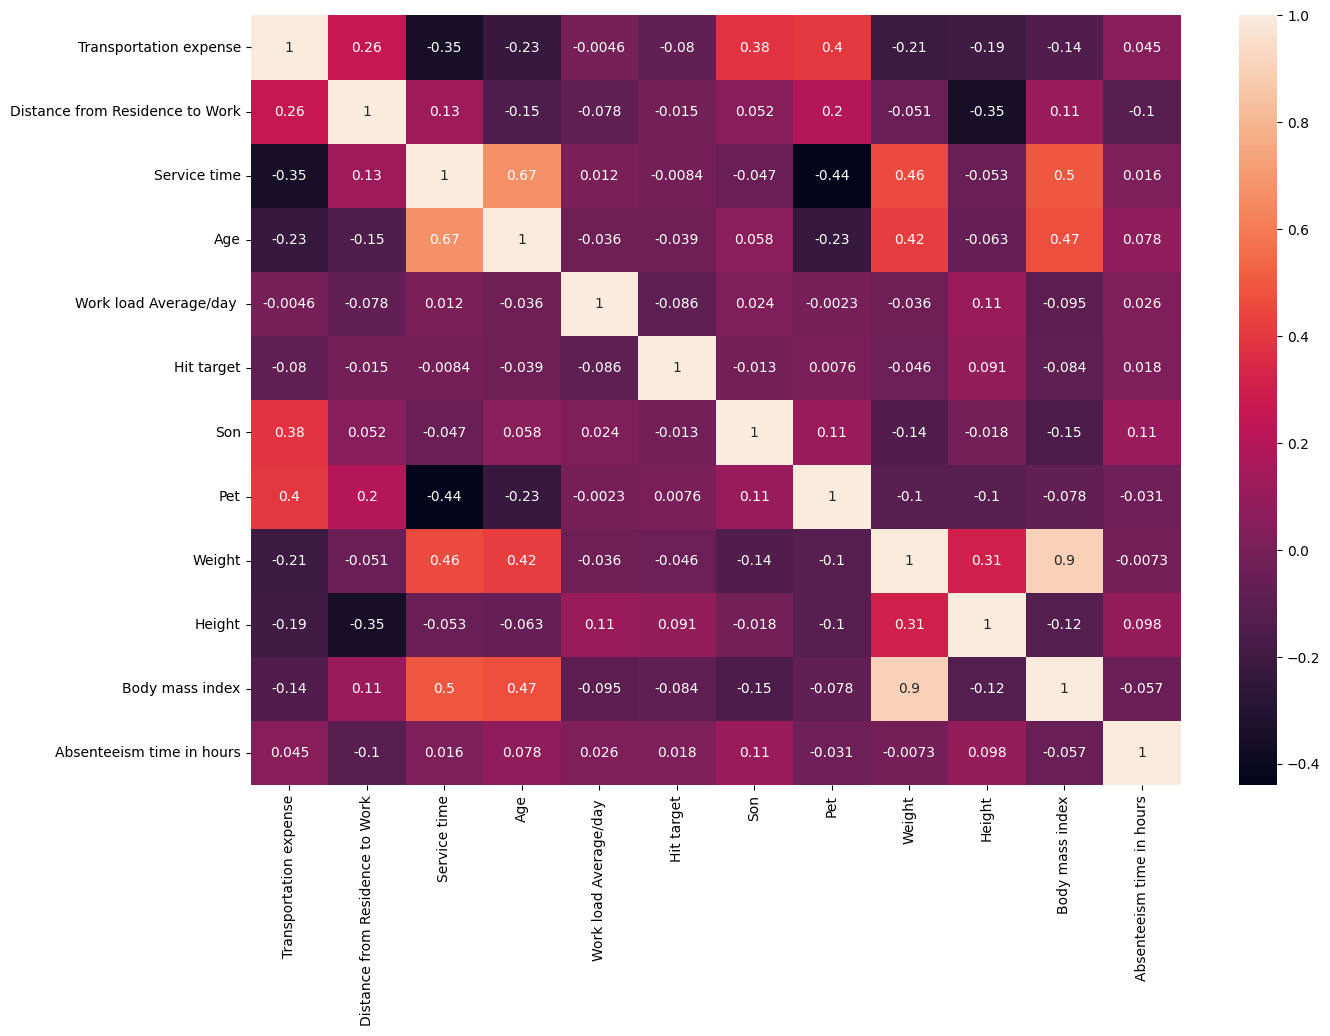

In [ ]:
#Generating the correlation heatmap
plt.figure(figsize = (15, 10))
heat = sns.heatmap(process_data.drop(['ID'],axis=1).corr(), annot = True)
heat.figure.savefig('Heatmap.png')

In [ ]:
# As per the heat map Weight is highly correlated with Body mass index. Moreover, weight divides with square of an height
#  is equal body mass index so weight and height column will be drop from the data set
process_data = process_data.drop(['Height','Weight'],axis=1)

## 3. Normalisation and Standardization

In [ ]:
# All the numerical data will be scaled
scaling_col = ['Transportation expense', 'Distance from Residence to Work','Service time',
              'Work load Average/day ', 'Hit target','Body mass index']

In [ ]:
for i in scaling_col:
    process_data[i]=(process_data[i]-min(process_data[i]))/(max(process_data[i])-min(process_data[i]))
    print(i,': Scaling Done')

Transportation expense : Scaling Done
Distance from Residence to Work : Scaling Done
Service time : Scaling Done
Work load Average/day  : Scaling Done
Hit target : Scaling Done
Body mass index : Scaling Done


In [ ]:
## Saving of the processed data set
# process_data.to_excel('Process data_new.xls', index = None)

In [ ]:
# Spliting the data set in train-test
Pro_X = process_data.drop(['Absenteeism time in hours'], axis=1)
Pro_Y = process_data['Absenteeism time in hours']
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(Pro_X,Pro_Y, test_size=0.2)

In [ ]:
# Applying KNN Machine learnig algorithm
Pro_KNN_model = KNeighborsRegressor(n_neighbors=3).fit(X_TRAIN,Y_TRAIN)
Final_KNN_predict = Pro_KNN_model.predict(X_TEST)
reg_acc(Y_TEST,Final_KNN_predict)

MSE of data:  122.25450450450451
***RMSE of data:  11.056875892606579 ***
Other Parameters:
R² :  -0.6682891475693418
MAE: 5.25


### Other algorithms

In [ ]:
#Applying linear regression machine learning algorithm
linReg = LinearRegression().fit(X_TRAIN,Y_TRAIN)
linear_predict = linReg.predict(X_TEST)
reg_acc(Y_TEST,linear_predict)
print('Intercept :',linReg.intercept_)
print('Coefficient')

for i,coef in zip(process_data.columns,linReg.coef_):
    print (i,"-->",coef)

MSE of data:  73.21612209886649
***RMSE of data:  8.556641987302408 ***
Other Parameters:
R² :  0.000890295047162537
MAE: 5.107664660126405
Intercept : 19.56760621109658
Coefficient
ID --> -0.19322745283436638
Reason for absence --> -0.4695018933612518
Month of absence --> 0.12756069629307687
Day of the week --> -0.770546004981586
Seasons --> -0.1795404908150422
Transportation expense --> 0.30435057768495044
Distance from Residence to Work --> -7.591563097929214
Service time --> -2.489099392035077
Age --> 0.3297138873274177
Work load Average/day  --> -0.5842415730958274
Hit target --> 3.6145025767408105
Disciplinary failure --> -13.105687799528544
Education --> -2.4525233368793313
Son --> 0.9502361261648782
Social drinker --> 2.0512295755400394
Social smoker --> -0.66367045292136
Pet --> -0.1766664974246842
Body mass index --> -11.918711730470179


In [ ]:
#Applying all the different machine learning algorithm to check which produce the best result
#################################################################
Deci_tree_pre = tree.DecisionTreeRegressor().fit(X_TRAIN,Y_TRAIN).predict(X_TEST)
print('Decision Tree ML')
reg_acc(Deci_tree_pre,Y_TEST)
print('######END########')
#################################################################

Ran_for_pre = RandomForestRegressor(n_estimators=50).fit(X_TRAIN,Y_TRAIN).predict(X_TEST)
print('Random Forest ML')
reg_acc(Ran_for_pre,Y_TEST)
print('######END########')
#################################################################

print('Naive Bayes')
NB_pre = GaussianNB().fit(X_TRAIN,Y_TRAIN).predict(X_TEST)
reg_acc(NB_pre,Y_TEST)

Decision Tree ML
MSE of data:  440.125
***RMSE of data:  20.97915632240725 ***
Other Parameters:
R² :  -0.05059234436725224
MAE: 7.628378378378378
######END########
Random Forest ML
MSE of data:  166.94602893558869
***RMSE of data:  12.920759611400124 ***
Other Parameters:
R² :  -0.10652953817454325
MAE: 6.038844272844273
######END########
Naive Bayes
MSE of data:  1240.4864864864865
***RMSE of data:  35.220540689865715 ***
Other Parameters:
R² :  -0.6088005213695744
MAE: 23.54054054054054


### KNN Map

### Measuring the number of 'k' suited with this Data set

In [ ]:
list_mae,list_mse,list_r2,num=[],[],[],[]
for i in range(50):
    if i%2!=0:
        dummy_KNN = KNeighborsRegressor(n_neighbors=i).fit(X_TRAIN,Y_TRAIN).predict(X_TEST)
        num.append(i)
        list_mae.append(mean_absolute_error(dummy_KNN,Y_TEST))
        list_mse.append(mean_squared_error(dummy_KNN,Y_TEST))
        list_r2.append(r2_score(dummy_KNN,Y_TEST))

*********** M A E ***********
Kth Value: 43
Lowest MAE Value: 4.32605279698303


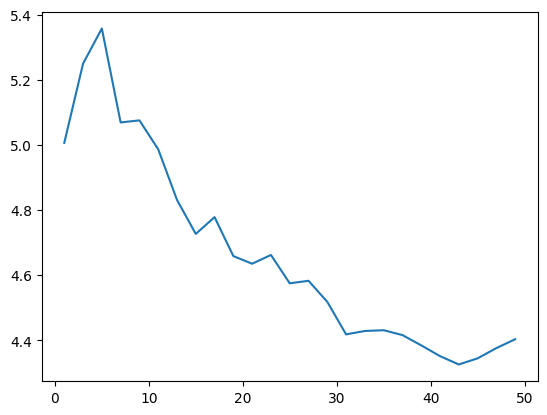

In [ ]:
sns.lineplot(x=num,y=list_mae)
print('*********** M A E ***********')
print('Kth Value:',num[list_mae.index(min(list_mae))])
print('Lowest MAE Value:',min(list_mae))

*********** M S E ***********
Kth Value: 43
Lowest MSE Value: 60.99006402291961


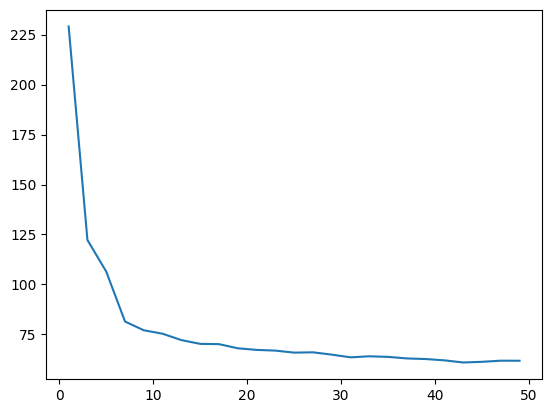

In [ ]:
sns.lineplot(x=num,y=list_mse)
print('*********** M S E ***********')
print('Kth Value:',num[list_mse.index(min(list_mse))])
print('Lowest MSE Value:',min(list_mse))

*********** R2 Value ***********
Kth Value 1
Lowest R2 Value: 0.018537763385863215


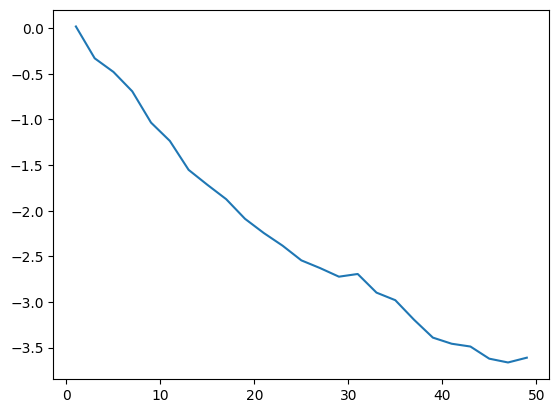

In [ ]:
sns.lineplot(x=num,y=list_r2)
print('*********** R2 Value ***********')
print('Kth Value',num[list_r2.index(max(list_r2))])
print('Lowest R2 Value:',max(list_r2))